In [1]:
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import figure
import dataframe_image as dfi

In [2]:
connection = psycopg2.connect(
    database="root",
    user="root",
    password="password",
    host="127.0.0.1",
    port="5440"
)
db = connection.cursor(cursor_factory=psycopg2.extras.RealDictCursor)


In [3]:
def getAll(query):
    db.execute(query)
    return pd.DataFrame(data=db.fetchall())

def plot(xs, ys, xlabel, ylabel, tittle, file_name, step=1, color="blue"):
    plt.figure(figsize=(12, 10))
    plt.grid(linestyle='-', linewidth=1)
    plt.plot(xs, ys, linestyle='--')
    plt.scatter(xs, ys)
    plt.ylim(0)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=14)
    plt.title(tittle, size=16)
    ax = plt.gca()
    plt.xticks(xs, rotation=60)
    ax.set_xticks(xs[::step])
    plt.savefig(f'plt/{file_name}')
    plt.show()

In [4]:
#  ilosc wszystkich tweetow

sql1 = """
select count(*) as "Ilość wszystkich tweetów"
from tweet t
where t.type = 1;

"""

df1 = getAll(sql1)
dfi.export(df1,"images/ilosc-wszystkich-tweetow.png")
df1


,Ilość wszystkich tweetów
0,776310


In [5]:
#  ilosc wszystkich komentarzy

sql1 = """
select count(*) as "Ilość wszystkich komentarzy"
from tweet t
where t.type = 2;

"""

df1 = getAll(sql1)
dfi.export(df1,"images/ilosc-wszystkich-komentarzy.png")
df1


,Ilość wszystkich komentarzy
0,91403


In [6]:
#  ilosc wszystkich cytowan

sql1 = """
select count(*) as "Ilość wszystkich cytowań"
from tweet t
where t.type = 3;

"""

df1 = getAll(sql1)
dfi.export(df1,"images/ilosc-wszystkich-cytowan.png")
df1


,Ilość wszystkich cytowań
0,6631


In [7]:
#  ilosc wszystkich retweetow

sql1 = """
select count(*) as "Ilość wszystkich retweetów"
from retweet;

"""

df1 = getAll(sql1)
dfi.export(df1,"images/ilosc-wszystkich-retweetow.png")
df1


,Ilość wszystkich retweetów
0,11910


In [8]:
#  ilosc wszystkich polubien

sql1 = """
select sum(t.favorite_count) as "Ilość wszystkich polubień"
from tweet t;


"""

df1 = getAll(sql1)
dfi.export(df1,"images/ilosc-wszystkich-polubien.png")
df1


,Ilość wszystkich polubień
0,581145796


In [9]:
#  srednia ilosc komentarzy per tweet

sql1 = """
select avg(t.reply_count) as "Średnia ilość komentarzy na tweet"
from tweet t
where t.type = 1;


"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-komentarzy-per-tweet.png")
df1


,Średnia ilość komentarzy na tweet
0,46.5250904922002808


In [10]:
#  srednia ilosc retweetow per tweet

sql1 = """
select avg(t.retweet_count) "Średnia ilość retweetów na tweet"
from tweet t
where t.type = 1;


"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-retweetow-per-tweet.png")
df1


,Średnia ilość retweetów na tweet
0,166.2808877896716518


In [11]:
#  srednia ilosc polubien per tweet

sql1 = """
select avg(t.favorite_count) "Średnia ilość polubień na tweet"
from tweet t
where t.type = 1;


"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-polubien-per-tweet.png")
df1


,Średnia ilość polubień na tweet
0,732.7786412644433281


In [12]:
#  srednia ilosc cytowan per tweet

sql1 = """
select avg(t.quote_count) "Średnia ilość cytowań na tweet"
from tweet t
where t.type = 1;

"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-cytowan-per-tweet.png")
df1


,Średnia ilość cytowań na tweet
0,44.6273705092037975


In [13]:
#   srednia ilosc komentarzy per tweet na dzien

sql1 = """
select avg(t.reply_count) as "Średnia liczba komentarzy na dzień", date_trunc('day', t.created_at) as "Dzień"
from tweet t
where t.type = 1
group by "Dzień"
order by "Dzień" desc;

"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-komentarzy-per-tweet-na-dzien.png", max_rows=-1)
df1


,Średnia liczba komentarzy na dzień,Dzień
0,9.1370835608956854,2021-04-29
1,15.7408419901585566,2021-04-28
2,34.4792004321988115,2021-04-27
3,20.0000000000000000,2021-04-26
4,21.5108225108225108,2021-04-25
...,...,...
420,31.1640066042927903,2020-03-05
421,57.4108612177729018,2020-03-04
422,30.2624338624338624,2020-03-03
423,28.5422804146208402,2020-03-02


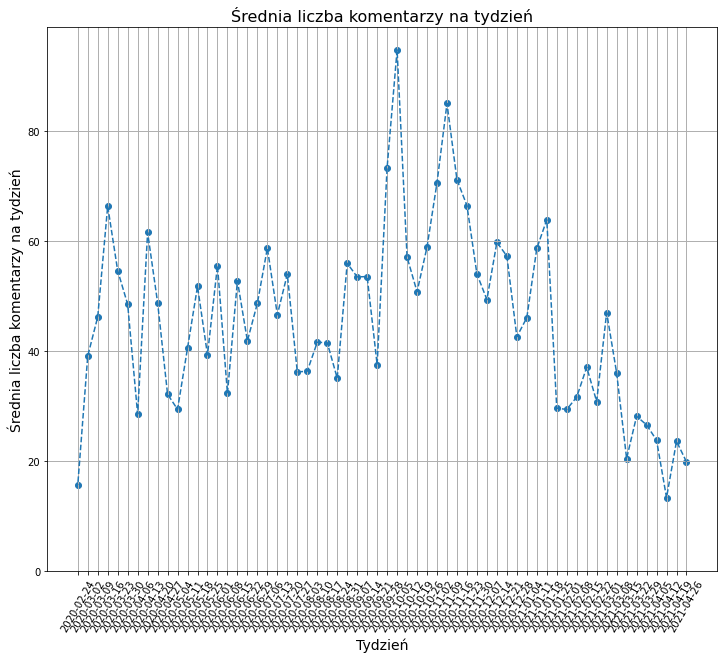

,Średnia liczba komentarzy na tydzień,Tydzień
0,19.8805219518825608,2021-04-26
1,23.6162090276148009,2021-04-19
2,13.3661159600997506,2021-04-12
3,23.8223188630892289,2021-04-05
4,26.6038376500315856,2021-03-29
...,...,...
57,54.6783644054519818,2020-03-23
58,66.4300038865137971,2020-03-16
59,46.2534289276807980,2020-03-09
60,39.1492073360273547,2020-03-02


In [14]:
#  srednia ilosc komentarzy per tweet na tydzien

sql1 = """
select avg(t.reply_count) as "Średnia liczba komentarzy na tydzień", date_trunc('week', t.created_at) as "Tydzień"
from tweet t
where t.type = 1
group by "Tydzień"
order by "Tydzień" desc;


"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Średnia liczba komentarzy na tydzień'], 'Tydzień', 'Średnia liczba komentarzy na tydzień', 'Średnia liczba komentarzy na tydzień', 'srednia-ilosc-komentarzy-per-tweet-na-tydzien.png')
df1


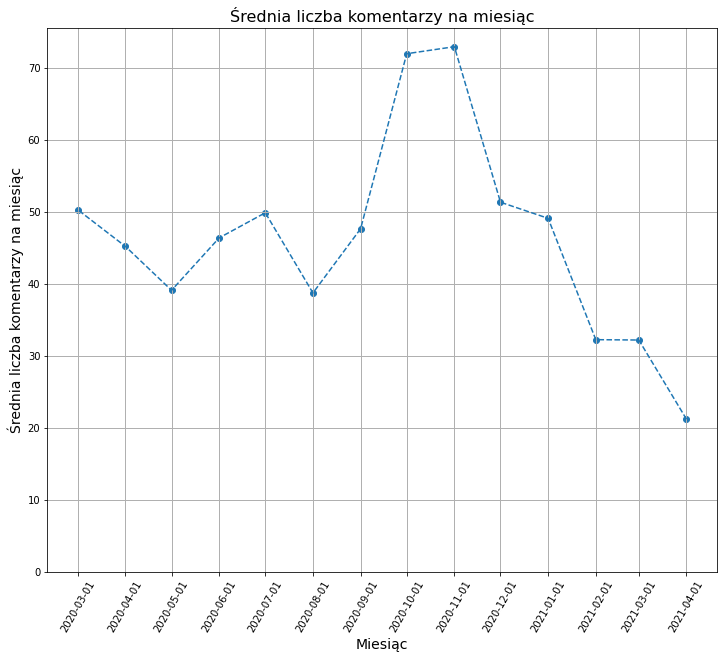

,Średnia liczba komentarzy na miesiąc,Miesiąc
0,21.1985605817962583,2021-04-01
1,32.2126199301257382,2021-03-01
2,32.2637984163513672,2021-02-01
3,49.1361672745299387,2021-01-01
4,51.3766281706481042,2020-12-01
5,73.0022400462461160,2020-11-01
6,72.0290759868824860,2020-10-01
7,47.6834885130295851,2020-09-01
8,38.7614242799081110,2020-08-01
9,49.9110989476657956,2020-07-01


In [15]:
# srednia ilosc komentarzy per tweet na miesiac

sql1 = """
select avg(t.reply_count) as "Średnia liczba komentarzy na miesiąc", date_trunc('month', t.created_at) as "Miesiąc"
from tweet t
where t.type = 1
group by "Miesiąc"
order by "Miesiąc" desc;
"""

df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Średnia liczba komentarzy na miesiąc'], 'Miesiąc', 'Średnia liczba komentarzy na miesiąc', 'Średnia liczba komentarzy na miesiąc', 'srednia-ilosc-komentarzy-per-tweet-na-miesiac.png')
df1


In [16]:
# srednia ilosc retweetow per tweet na dzien

sql1 = """
select avg(t.retweet_count) as "Średnia liczba retweetow na dzien", date_trunc('day', t.created_at) as "Dzień"
from tweet t
where t.type = 1
group by "Dzień"
order by "Dzień" desc;
"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-retweetow-per-tweet-na-dzien.png", max_rows=-1)
df1


,Średnia liczba retweetow na dzien,Dzień
0,33.1977061714909885,2021-04-29
1,76.0267905959540733,2021-04-28
2,64.8092922744462453,2021-04-27
3,96.7334777898158180,2021-04-26
4,110.0151515151515152,2021-04-25
...,...,...
420,98.3274628508530545,2020-03-05
421,269.3955019199122326,2020-03-04
422,189.2174603174603175,2020-03-03
423,99.9809056192034915,2020-03-02


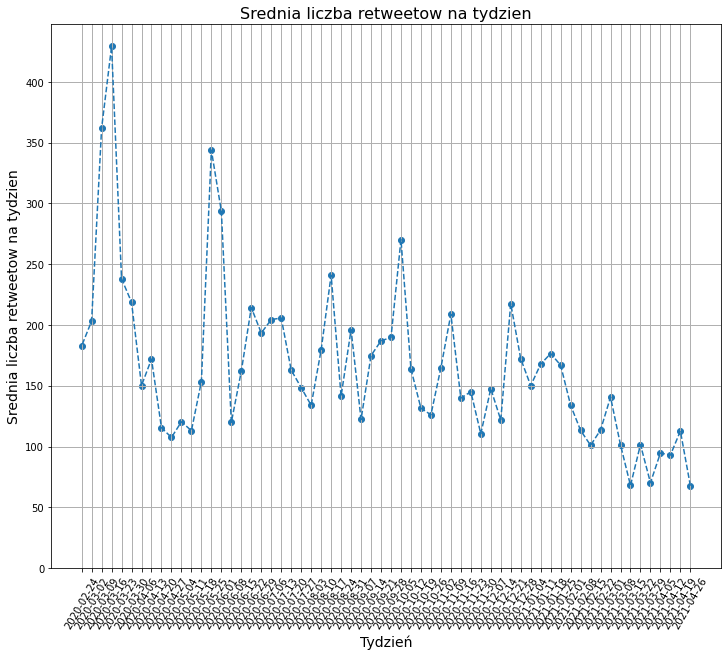

,Srednia liczba retweetow na tydzien,Tydzień
0,67.7409270082914231,2021-04-26
1,112.7646092466557146,2021-04-19
2,92.9617362842892768,2021-04-12
3,94.6795060961404054,2021-04-05
4,70.2102811118130133,2021-03-29
...,...,...
57,238.0608647971173429,2020-03-23
58,429.1966575981344734,2020-03-16
59,361.8432824189526185,2020-03-09
60,203.2397419956481194,2020-03-02


In [17]:
# srednia ilosc retweetow per tweet na tydzien

sql1 = """
select avg(t.retweet_count) as "Srednia liczba retweetow na tydzien", date_trunc('week', t.created_at) as "Tydzień"
from tweet t
where t.type = 1
group by "Tydzień"
order by "Tydzień" desc;
"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Srednia liczba retweetow na tydzien'], 'Tydzień', 'Srednia liczba retweetow na tydzien', 'Srednia liczba retweetow na tydzien', 'srednia-ilosc-retweetow-per-tweet-na-tydzien.png')
df1


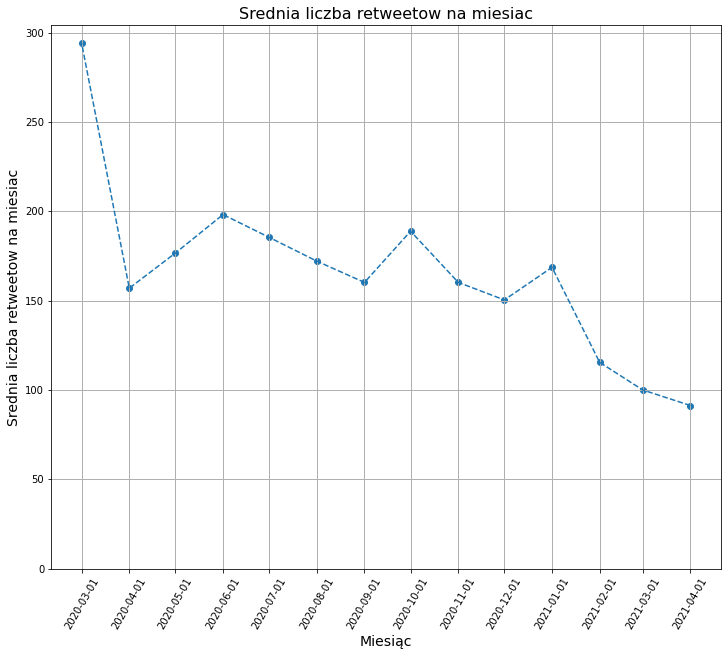

,Srednia liczba retweetow na miesiac,Miesiąc
0,91.2991691316389397,2021-04-01
1,99.9933495309202476,2021-03-01
2,115.4356008893396263,2021-02-01
3,168.5976240218122588,2021-01-01
4,150.3697551371969977,2020-12-01
5,160.1935291567309777,2020-11-01
6,188.8103396874945198,2020-10-01
7,160.1615154353295503,2020-09-01
8,172.0743594274606821,2020-08-01
9,185.3750264849212515,2020-07-01


In [18]:
# srednia ilosc retweetow per tweet na miesiac

sql1 = """
select avg(t.retweet_count) as "Srednia liczba retweetow na miesiac", date_trunc('month', t.created_at) as "Miesiąc"
from tweet t
where t.type = 1
group by "Miesiąc"
order by "Miesiąc" desc;
"""

df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Srednia liczba retweetow na miesiac'], 'Miesiąc', 'Srednia liczba retweetow na miesiac', 'Srednia liczba retweetow na miesiac', 'srednia-ilosc-retweetow-per-tweet-na-miesiac.png')
df1


In [19]:
# srednia ilosc polubien per tweet na dzien

sql1 = """
select avg(t.favorite_count) as "Srednia liczba polubien na dzien", date_trunc('day', t.created_at) as "Dzień"
from tweet t
where t.type = 1
group by "Dzień"
order by "Dzień" desc;
"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-polubien-per-tweet-na-dzien.png", max_rows=-1)
df1


,Srednia liczba polubien na dzien,Dzień
0,148.9066084107045330,2021-04-29
1,354.3969382176052488,2021-04-28
2,331.3965424095083739,2021-04-27
3,560.8878656554712893,2021-04-26
4,545.0027056277056277,2021-04-25
...,...,...
420,277.3010456796917997,2020-03-05
421,1015.8420186505759737,2020-03-04
422,557.2227513227513228,2020-03-03
423,284.5275504637206765,2020-03-02


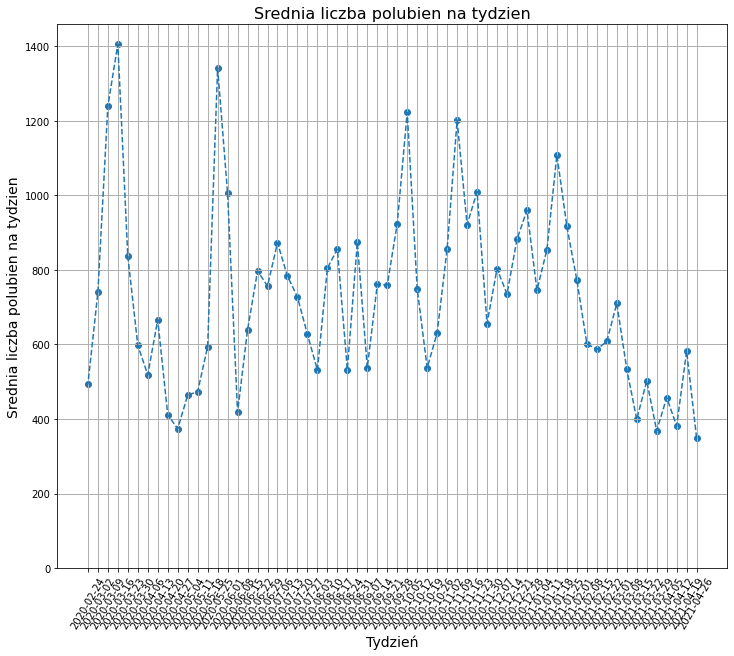

,Srednia liczba polubien na tydzien,Tydzień
0,349.2801413619681936,2021-04-26
1,581.7769694125009779,2021-04-19
2,381.8794420199501247,2021-04-12
3,457.3203385881804768,2021-04-05
4,368.4729153506001263,2021-03-29
...,...,...
57,837.2103242989190036,2020-03-23
58,1405.8670812281383599,2020-03-16
59,1239.4849594763092269,2020-03-09
60,739.5567298725520671,2020-03-02


In [20]:
# srednia ilosc polubien per tweet na tydzien

sql1 = """
select avg(t.favorite_count) as "Srednia liczba polubien na tydzien", date_trunc('week', t.created_at) as "Tydzień"
from tweet t
where t.type = 1
group by "Tydzień"
order by "Tydzień" desc;

"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Srednia liczba polubien na tydzien'], 'Tydzień', 'Srednia liczba polubien na tydzien', 'Srednia liczba polubien na tydzien', 'srednia-ilosc-polubien-per-tweet-na-tydzien.png')
df1


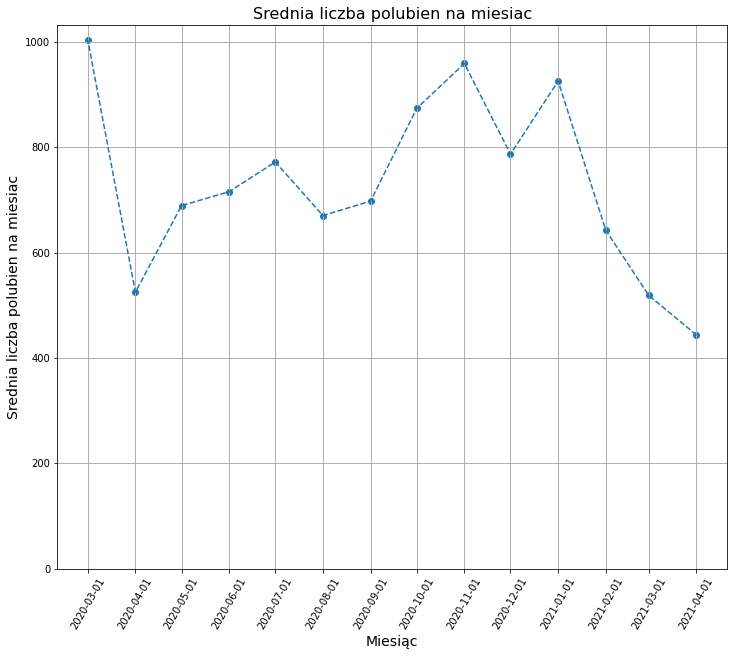

,Srednia liczba polubien na miesiac,Miesiąc
0,443.5736759801797389,2021-04-01
1,518.7002500576373987,2021-03-01
2,642.3306939189452744,2021-02-01
3,925.6227647746184625,2021-01-01
4,786.8181898082230308,2020-12-01
5,959.0216417371197341,2020-11-01
6,873.7629026883888957,2020-10-01
7,697.7828035186307458,2020-09-01
8,670.3478353065912705,2020-08-01
9,772.0792252277703228,2020-07-01


In [21]:
# srednia ilosc polubien per tweet na miesiac

sql1 = """
select avg(t.favorite_count) as "Srednia liczba polubien na miesiac", date_trunc('month', t.created_at) as "Miesiąc"
from tweet t
where t.type = 1
group by "Miesiąc"
order by "Miesiąc" desc;

"""

df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Srednia liczba polubien na miesiac'], 'Miesiąc', 'Srednia liczba polubien na miesiac', 'Srednia liczba polubien na miesiac', 'srednia-ilosc-polubien-per-tweet-na-miesiac.png')
df1


In [22]:
# srednia ilosc cytowan per tweet na dzien

sql1 = """
select avg(t.quote_count) as "Srednia liczba cytowan na dzien", date_trunc('day', t.created_at) as "Dzień"
from tweet t
where t.type = 1
group by "Dzień"
order by "Dzień" desc;

"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-cytowan-per-tweet-na-dzien.png", max_rows=-1)
df1


,Srednia liczba cytowan na dzien,Dzień
0,6.0742763517203714,2021-04-29
1,15.3630399125205030,2021-04-28
2,57.1274986493787142,2021-04-27
3,22.8401950162513543,2021-04-26
4,21.1147186147186147,2021-04-25
...,...,...
420,45.5811777655476059,2020-03-05
421,38.7745474492594624,2020-03-04
422,29.9550264550264550,2020-03-03
423,45.0540098199672668,2020-03-02


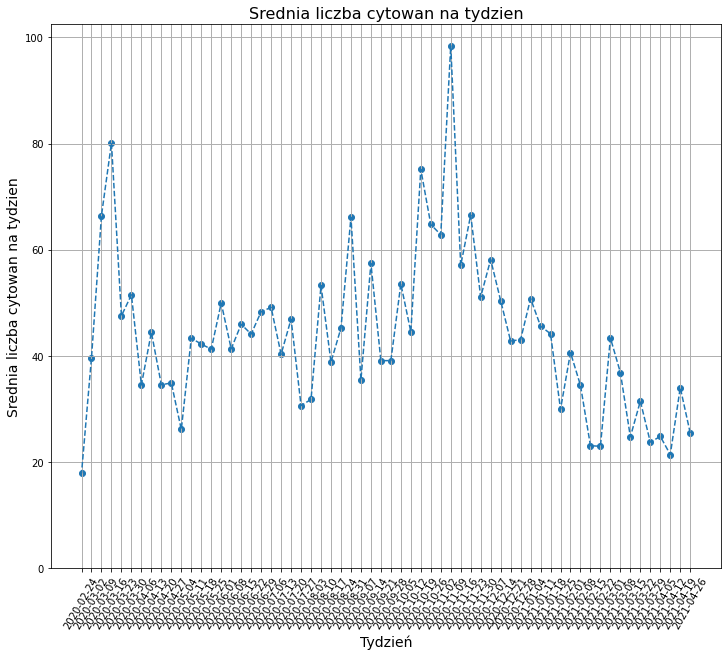

,Srednia liczba cytowan na tydzien,Tydzień
0,25.4352317520728558,2021-04-26
1,34.0087616365485410,2021-04-19
2,21.3923004987531172,2021-04-12
3,24.8091170303642153,2021-04-05
4,23.7259159823120657,2021-03-29
...,...,...
57,47.5358765470781764,2020-03-23
58,80.0873688301593471,2020-03-16
59,66.4336034912718204,2020-03-09
60,39.6505284426484302,2020-03-02


In [23]:
# srednia ilosc cytowan per tweet na tydzien

sql1 = """
select avg(t.quote_count) as "Srednia liczba cytowan na tydzien", date_trunc('week', t.created_at) as "Tydzień"
from tweet t
where t.type = 1
group by "Tydzień"
order by "Tydzień" desc;

"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Srednia liczba cytowan na tydzien'], 'Tydzień', 'Srednia liczba cytowan na tydzien', 'Srednia liczba cytowan na tydzien', 'srednia-ilosc-cytowan-per-tweet-na-tydzien.png')
df1


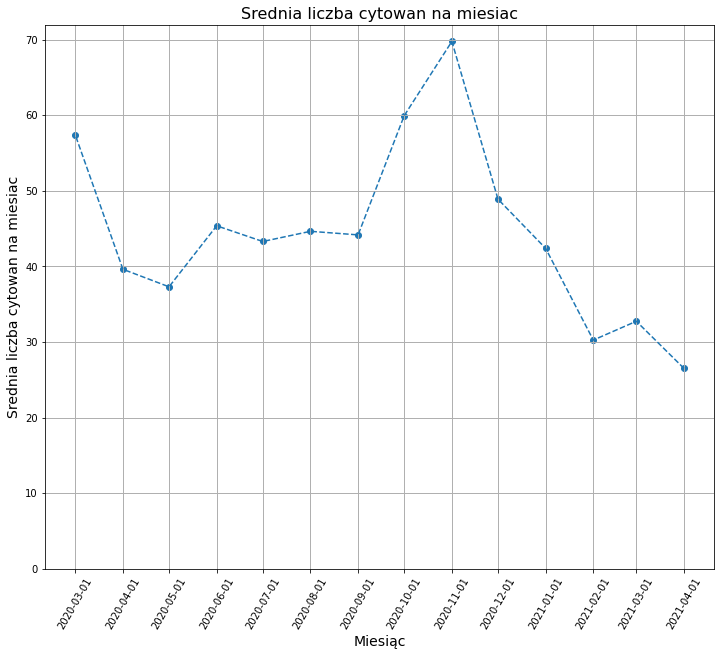

,Srednia liczba cytowan na miesiac,Miesiąc
0,26.5073383951617461,2021-04-01
1,32.7456328586376292,2021-03-01
2,30.2544954557865585,2021-02-01
3,42.3918239439113346,2021-01-01
4,48.9032150327831391,2020-12-01
5,69.7802225594334851,2020-11-01
6,59.9584553601178472,2020-10-01
7,44.1763539198942207,2020-09-01
8,44.6482947517229192,2020-08-01
9,43.3014866869129176,2020-07-01


In [24]:
# srednia ilosc cytowan per tweet na miesiac

sql1 = """
select avg(t.quote_count) as "Srednia liczba cytowan na miesiac", date_trunc('month', t.created_at) as "Miesiąc"
from tweet t
where t.type = 1
group by "Miesiąc"
order by "Miesiąc" desc;

"""

df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Srednia liczba cytowan na miesiac'], 'Miesiąc', 'Srednia liczba cytowan na miesiac', 'Srednia liczba cytowan na miesiac', 'srednia-ilosc-cytowan-per-tweet-na-miesiac.png')
df1


In [25]:
# srednia ilosc pozytywnych komentarzy per tweet

sql1 = """
select avg(count) as "Średnia liczba pozytywnych komentarzy na tweet"
from (select count(*) as count
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound >= 0.05
      group by t.id
      order by count desc) as counts;

"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-pozytywnych-komentarzy-per-tweet.png")
df1


,Średnia liczba pozytywnych komentarzy na tweet
0,15.7698209718670077


In [26]:
# srednia ilosc negatywnych komentarzy per tweet

sql1 = """
select avg(count) "Średnia liczba negatywnych komentarzy na tweet"
from (select count(*) as count
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound <= -0.05
      group by t.id
      order by count desc) as counts;


"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-negatywnych-komentarzy-per-tweet.png")
df1


,Średnia liczba negatywnych komentarzy na tweet
0,14.8806722689075630


In [27]:
# srednia ilosc pozytywnych komentarzy per tweet per dzien

sql1 = """
select avg(count) as "Średnia liczba pozytywnych komentarzy na tweet", day as "Dzień"
from (select count(*) as count, date_trunc('day', t.created_at) as day
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound >= 0.05
      group by t.id, day
      order by count desc) as res
group by day;

"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-pozytywnych-komentarzy-per-tweet-per-dzien.png", max_rows=-1)
df1


,Średnia liczba pozytywnych komentarzy na tweet,Dzień
0,61.0000000000000000,2020-03-01
1,29.1666666666666667,2020-03-02
2,39.7500000000000000,2020-03-03
3,27.6666666666666667,2020-03-05
4,4.0000000000000000,2020-03-06
...,...,...
366,17.6666666666666667,2021-04-24
367,29.6666666666666667,2021-04-26
368,87.0000000000000000,2021-04-27
369,1.00000000000000000000,2021-04-28


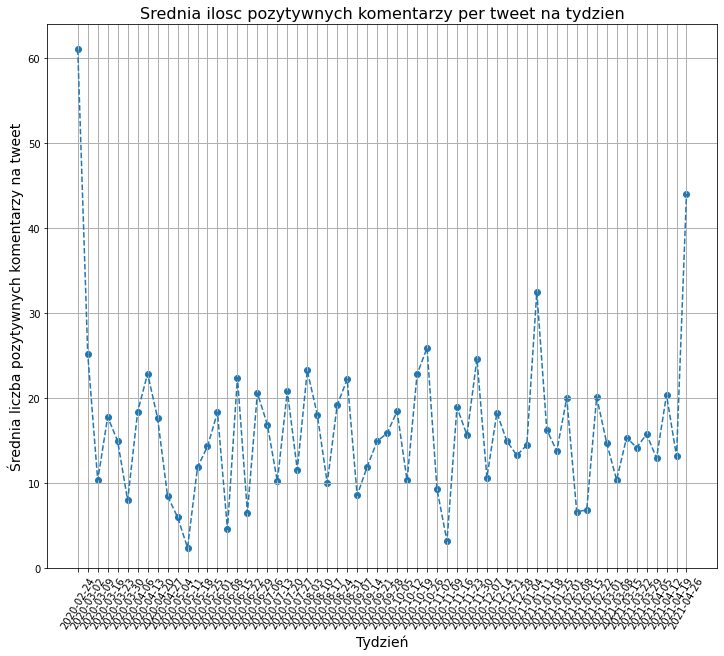

,Średnia liczba pozytywnych komentarzy na tweet,Tydzień
0,61.0000000000000000,2020-02-24
1,25.1739130434782609,2020-03-02
2,10.3333333333333333,2020-03-09
3,17.7777777777777778,2020-03-16
4,14.9166666666666667,2020-03-23
...,...,...
57,15.7368421052631579,2021-03-29
58,12.9444444444444444,2021-04-05
59,20.3714285714285714,2021-04-12
60,13.1538461538461538,2021-04-19


In [28]:
# srednia ilosc pozytywnych komentarzy per tweet per tydzien

sql1 = """
select avg(count) as "Średnia liczba pozytywnych komentarzy na tweet", week as "Tydzień"
from (select count(*) as count, date_trunc('week', t.created_at) as week
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound >= 0.05
      group by t.id, week
      order by count desc) as res
group by week;

"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Średnia liczba pozytywnych komentarzy na tweet'], 'Tydzień', 'Średnia liczba pozytywnych komentarzy na tweet', 'Srednia ilosc pozytywnych komentarzy per tweet na tydzien', 'srednia-ilosc-pozytywnych-komentarzy-per-tweet-per-tydzien.png')
df1


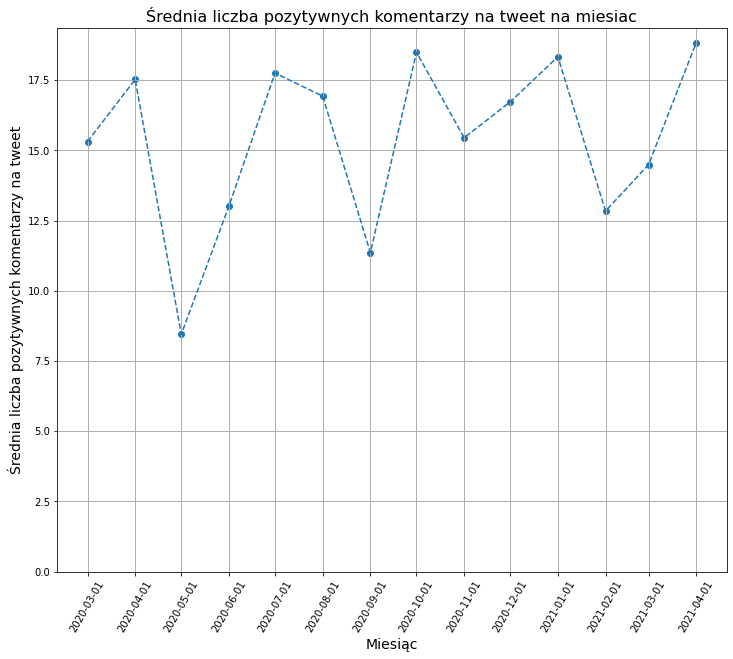

,Średnia liczba pozytywnych komentarzy na tweet,Miesiąc
0,15.3153846153846154,2020-03-01
1,17.5250000000000000,2020-04-01
2,8.4528301886792453,2020-05-01
3,13.0135135135135135,2020-06-01
4,17.7536231884057971,2020-07-01
5,16.9295774647887324,2020-08-01
6,11.3582089552238806,2020-09-01
7,18.4935064935064935,2020-10-01
8,15.4487179487179487,2020-11-01
9,16.7261904761904762,2020-12-01


In [29]:
# srednia ilosc pozytywnych komentarzy per tweet per miesiac

sql1 = """
select avg(count) as "Średnia liczba pozytywnych komentarzy na tweet", month as "Miesiąc"
from (select count(*) as count, date_trunc('month', t.created_at) as month
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound >= 0.05
      group by t.id, month
      order by count desc) as res
group by month;

"""

df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Średnia liczba pozytywnych komentarzy na tweet'], 'Miesiąc', 'Średnia liczba pozytywnych komentarzy na tweet', 'Średnia liczba pozytywnych komentarzy na tweet na miesiac', 'srednia-ilosc-pozytywnych-komentarzy-per-tweet-per-miesiac.png')
df1


In [30]:
# srednia ilosc negatywnych komentarzy per tweet per dzien

sql1 = """
select avg(count) as "Średnia liczba negatywnych komentarzy na tweet", day as "Dzień"
from (select count(*) as count, date_trunc('day', t.created_at) as day
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound <= -0.05
      group by t.id, day
      order by count desc) as res
group by day;


"""

df1 = getAll(sql1)
dfi.export(df1,"images/srednia-ilosc-negatywnych-komentarzy-per-tweet-per-dzien.png", max_rows=-1)
df1


,Średnia liczba negatywnych komentarzy na tweet,Dzień
0,29.0000000000000000,2020-03-01
1,33.5000000000000000,2020-03-02
2,15.3750000000000000,2020-03-03
3,22.6666666666666667,2020-03-05
4,11.6666666666666667,2020-03-06
...,...,...
356,6.0000000000000000,2021-04-24
357,1.00000000000000000000,2021-04-25
358,29.3333333333333333,2021-04-26
359,40.5000000000000000,2021-04-27


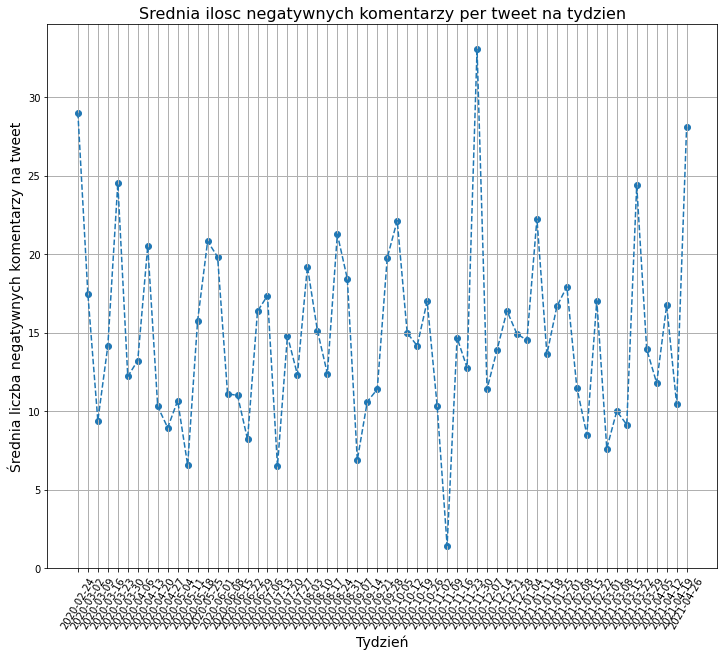

,Średnia liczba negatywnych komentarzy na tweet,Tydzień
0,29.0000000000000000,2020-02-24
1,17.4642857142857143,2020-03-02
2,9.3888888888888889,2020-03-09
3,14.1538461538461538,2020-03-16
4,24.5000000000000000,2020-03-23
...,...,...
57,13.9375000000000000,2021-03-29
58,11.7894736842105263,2021-04-05
59,16.7380952380952381,2021-04-12
60,10.4444444444444444,2021-04-19


In [31]:
# srednia ilosc negatywnych komentarzy per tweet per tydzien

sql1 = """
select avg(count) as "Średnia liczba negatywnych komentarzy na tweet", week as "Tydzień"
from (select count(*) as count, date_trunc('week', t.created_at) as week
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound <= -0.05
      group by t.id, week
      order by count desc) as res
group by week;
"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Średnia liczba negatywnych komentarzy na tweet'], 'Tydzień', 'Średnia liczba negatywnych komentarzy na tweet', 'Srednia ilosc negatywnych komentarzy per tweet na tydzien', 'srednia-ilosc-negatywnych-komentarzy-per-tweet-per-tydzien.png')
df1


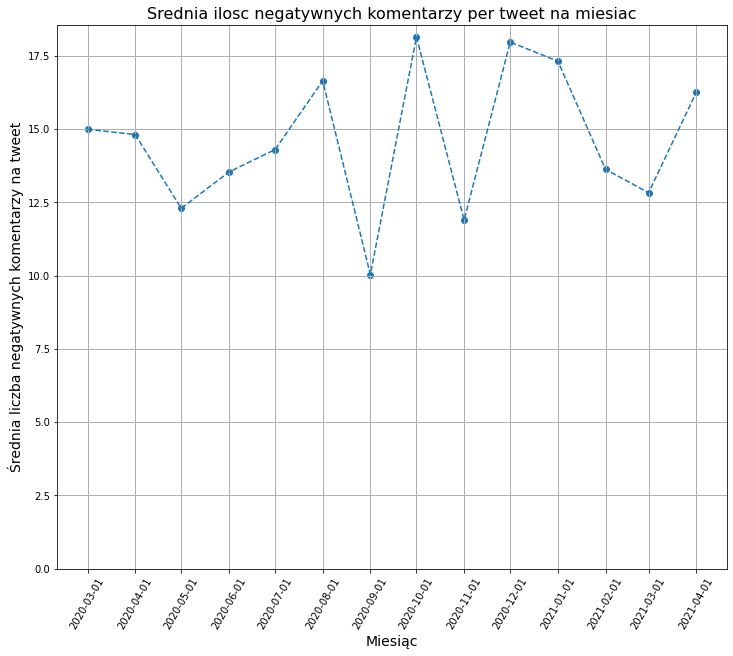

,Średnia liczba negatywnych komentarzy na tweet,Miesiąc
0,15.0000000000000000,2020-03-01
1,14.8202247191011236,2020-04-01
2,12.3015873015873016,2020-05-01
3,13.5405405405405405,2020-06-01
4,14.3066666666666667,2020-07-01
5,16.6521739130434783,2020-08-01
6,10.0379746835443038,2020-09-01
7,18.1506849315068493,2020-10-01
8,11.9054054054054054,2020-11-01
9,17.9746835443037975,2020-12-01


In [32]:
# srednia ilosc negatywnych komentarzy per tweet per miesiac

sql1 = """
select avg(count) as "Średnia liczba negatywnych komentarzy na tweet", month as "Miesiąc"
from (select count(*) as count, date_trunc('month', t.created_at) as month
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound <= -0.05
      group by t.id, month
      order by count desc) as res
group by month;
"""


df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Średnia liczba negatywnych komentarzy na tweet'], 'Miesiąc', 'Średnia liczba negatywnych komentarzy na tweet', 'Srednia ilosc negatywnych komentarzy per tweet na miesiac', 'srednia-ilosc-negatywnych-komentarzy-per-tweet-per-miesiac.png')
df1
